In [1]:
import numpy as np
import sklearn.datasets
import pandas as pd
import matplotlib.pyplot as plt
import math
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
import itertools
from sklearn.decomposition import PCA
from sklearn.svm import SVC

# Analyse des données 
## Quelles sont les attributs ? 

In [2]:
iris_data = sklearn.datasets.load_iris()
df = pd.DataFrame(iris_data.data)
iris_data.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

## Données sur chaque classes séparées :

In [3]:
setosa = iris_data.data[:49]
versicolour = iris_data.data[50:99]
virginica = iris_data.data[100:]

In [4]:
ds = np.c_[iris_data.data, iris_data.target]

In [5]:
print("Moyenne longueurs sépales des classes")
print("Setosa ",setosa[:,0].mean())
print("Versicolour ", versicolour[:,0].mean())
print("Virginica ", virginica[:,0].mean())

Moyenne longueurs sépales des classes
Setosa  5.006122448979592
Versicolour  5.940816326530613
Virginica  6.587999999999998


In [6]:
print("Moyenne largeurs sépales des classes")
print("Setosa ",setosa[:,1].mean())
print("Versicolour ", versicolour[:,1].mean())
print("Virginica ", virginica[:,1].mean())

Moyenne largeurs sépales des classes
Setosa  3.4306122448979592
Versicolour  2.7693877551020414
Virginica  2.974


In [7]:
print("Moyenne longueurs pétales des classes")
print("Setosa ",setosa[:,2].mean())
print("Versicolour ", versicolour[:,2].mean())
print("Virginica ", virginica[:,2].mean())

Moyenne longueurs pétales des classes
Setosa  1.463265306122449
Versicolour  4.263265306122449
Virginica  5.5520000000000005


In [8]:
print("Moyenne largeurs pétales des classes")
print("Setosa ",setosa[:,3].mean())
print("Versicolour ", versicolour[:,3].mean())
print("Virginica ", virginica[:,3].mean())

Moyenne largeurs pétales des classes
Setosa  0.24693877551020407
Versicolour  1.3265306122448979
Virginica  2.0260000000000002


## Croisement 2 à 2 des attributs sur le dataSet :

In [9]:
dfDs = pd.DataFrame(ds, columns=["sep_len", "sep_wid", "pet_len", "pet_wid", "species"])
ds.shape

(150, 5)

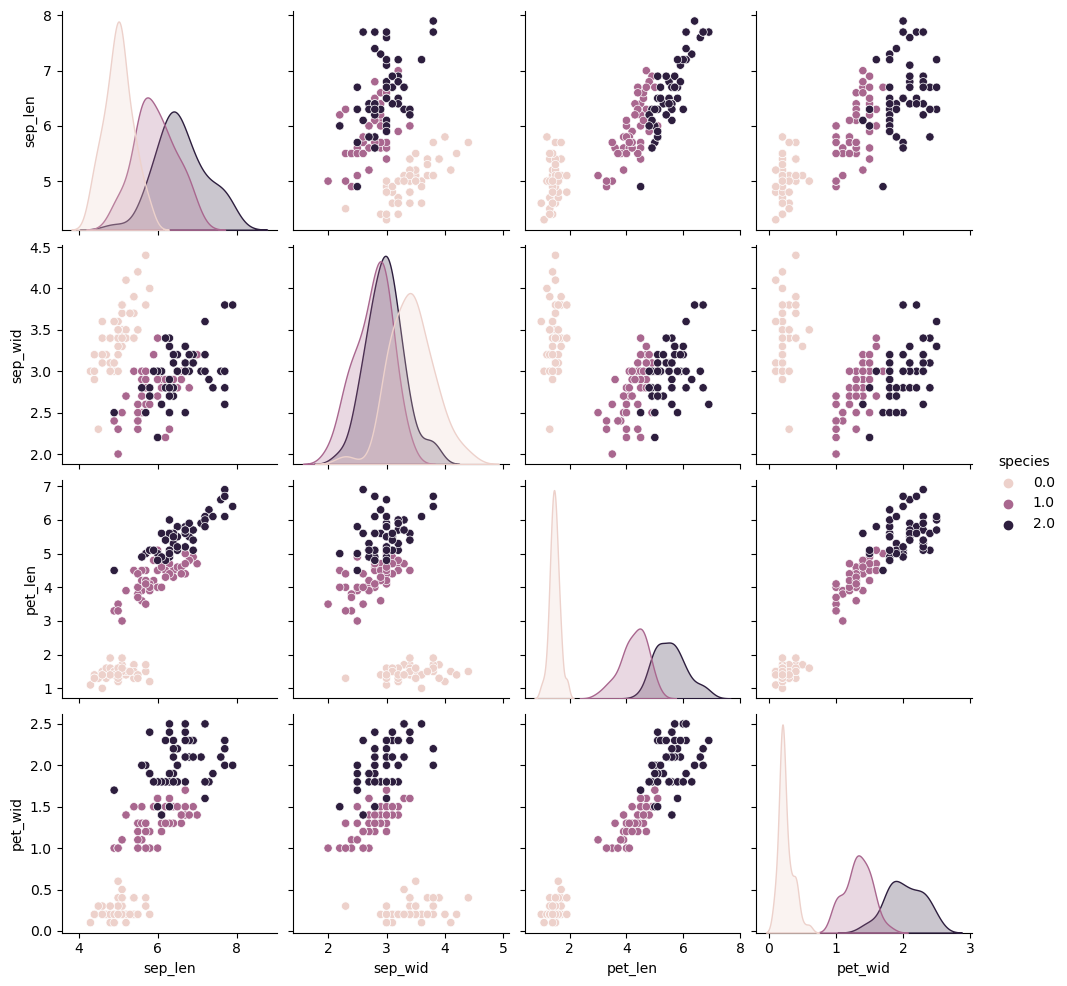

In [10]:
sns.pairplot(dfDs, hue = "species")

On remarque une délimitation plus prononcée de chaque classes avec la paire (pet_wid,pet_len)
# Classification 


In [11]:

X = pd.DataFrame(iris_data.data, columns=iris_data.feature_names)
Y = pd.Series(iris_data.target)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [12]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, Y_train)
Y_pred = rf_classifier.predict(X_test)
cm = confusion_matrix(Y_test, Y_pred)
classes = iris_data.target_names

In [13]:
def plot_confusion_matrix(cm, classes,
                          normalize,
                          title,
                          cmap=plt.cm.Greens):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Type')
    plt.xlabel('Prédiction')
    


<Figure size 800x600 with 0 Axes>

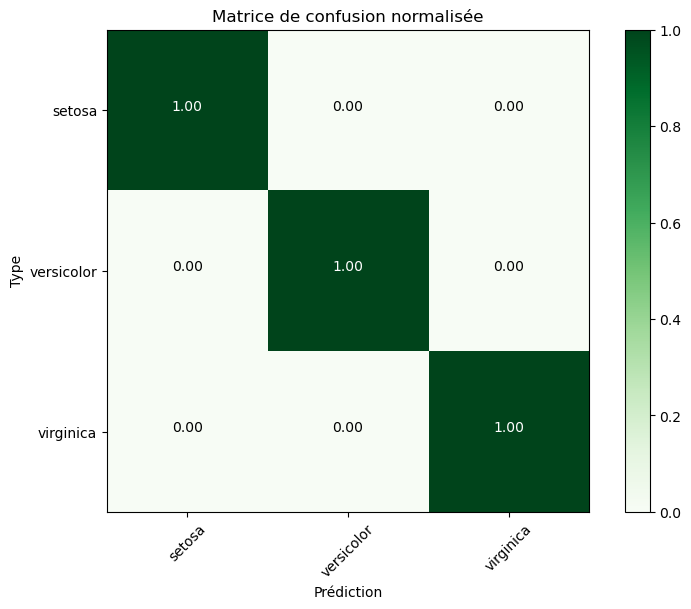

<Figure size 800x600 with 0 Axes>

In [14]:
plt.figure(figsize=(8, 6))
plot_confusion_matrix(cm, classes, normalize=True, title='Matrice de confusion normalisée')
plt.figure(figsize=(8, 6))

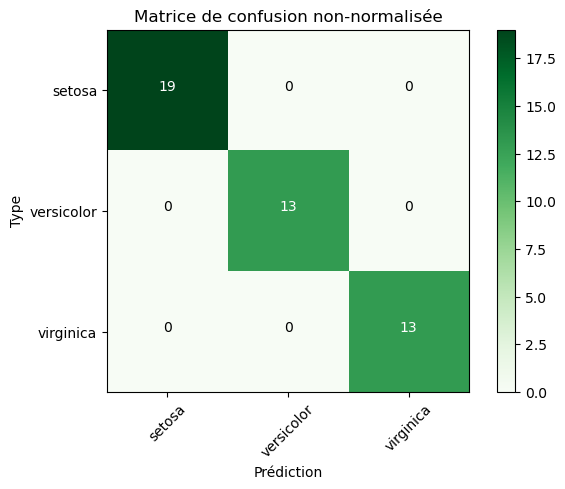

In [15]:
plot_confusion_matrix(cm, classes, normalize=False, title='Matrice de confusion non-normalisée')

# Conclusion

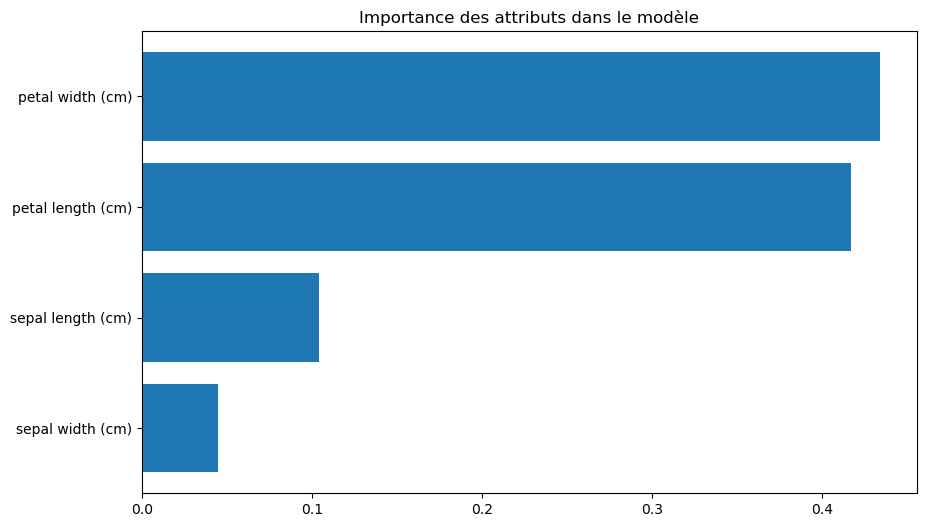

In [16]:
feature_importance = rf_classifier.feature_importances_
sorted_idx = np.argsort(feature_importance)
plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(iris_data.feature_names)[sorted_idx])
plt.title('Importance des attributs dans le modèle')
plt.show()

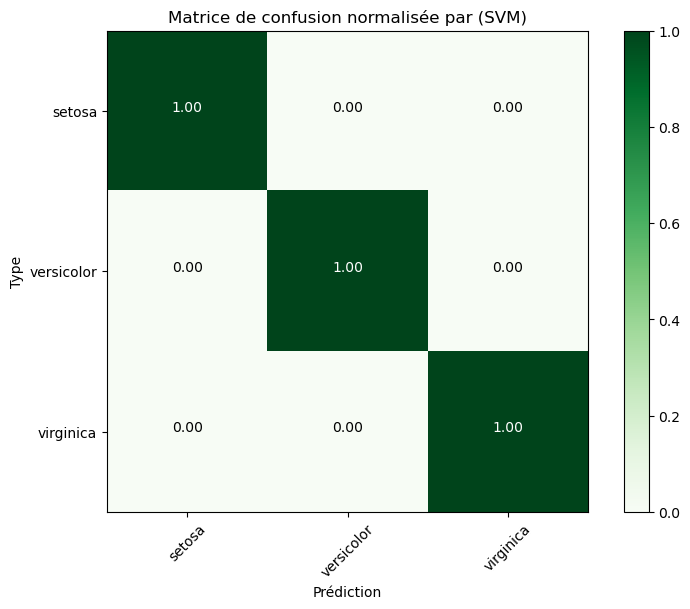

In [17]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)
svm_classifier = SVC(kernel='linear', random_state=42)
svm_classifier.fit(X_train, Y_train)
Y_pred_svm = svm_classifier.predict(X_test)
svm = confusion_matrix(Y_test, Y_pred_svm)
plt.figure(figsize=(8, 6))
plot_confusion_matrix(svm, classes, normalize=True, title='Matrice de confusion normalisée par (SVM)') #(Support Vector Machine)
plt.show()

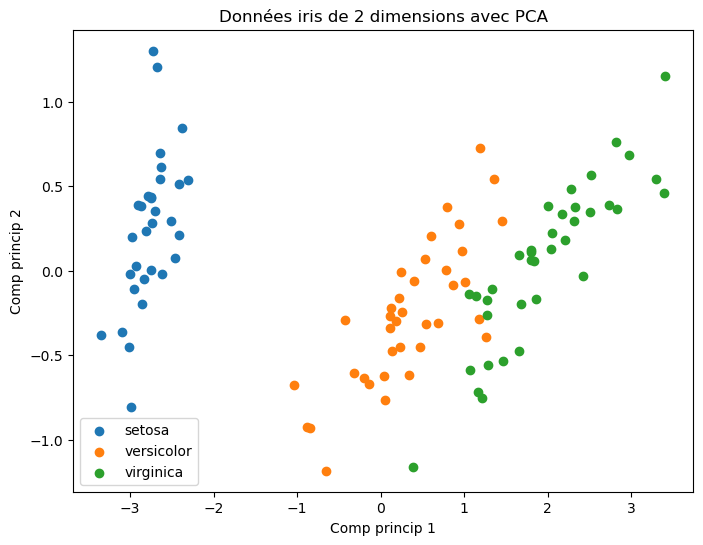

In [18]:
X_combined = np.concatenate([X_train.iloc[:, :2], X_train.iloc[:, 2:]], axis=1)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_combined)
plt.figure(figsize=(8, 6))
for i, species in enumerate(classes):
    plt.scatter(X_pca[Y_train == i, 0], X_pca[Y_train == i, 1], label=species)
plt.title('Données iris de 2 dimensions avec PCA')
plt.xlabel('Comp princip 1')
plt.ylabel('Comp princip 2')
plt.legend()
plt.show()
